In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import json as js
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from itertools import compress
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
import heapq
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None) # see the full cols

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 1.Data Proc

## (0).Import data

In [2]:
def sentenceClean(x):
    result = x.lower()
    result = re.sub('pretty|very|always|food|chinese', ' ', result)
    result = re.sub('not so', 'not', result)
    result = re.sub('high\squality', 'great', result)
    result = re.sub('low\squality', 'bad', result)
    result = re.sub('n\'t\s', ' not', result)
    result = re.sub('\sstars|\sstar', 'stars', result)
    result = re.sub('0stars', 'zerostars', result)
    result = re.sub('1stars', 'onestars', result)
    result = re.sub('2stars', 'twostars', result)
    result = re.sub('3stars', 'threestars', result)
    result = re.sub('4stars', 'fourstars', result)
    result = re.sub('5stars', 'fivestars', result)
    result = re.sub('not\s', ' not', result)
    result = re.sub('never\s', ' not', result)
    return result

In [4]:
def sentenceClean2(x):
    result = x.lower()
    result = re.sub('as (\w+?) as', '\\1', result)
    result = re.sub('not only (\w+?), but also', '\\1 and ', result)
    result = re.sub('\'s|\'m|\'re|\'d|\'ll|\'ve', ' ', result)
    result = re.sub('fast food', 'fastfood', result)
    result = re.sub('pretty|very|always|food|chinese', ' ', result)
    result = re.sub('high\squality', 'great', result)
    result = re.sub('low\squality', 'bad', result)
    result = re.sub('[\.,\(\)\+:!\?#]', ' ', result)
    result = re.sub('n\'t\s', ' not', result)
    result = re.sub('\sstars|\sstar', 'stars', result)
    result = re.sub('0stars', 'zerostars', result)
    result = re.sub('1stars', 'onestars', result)
    result = re.sub('2stars', 'twostars', result)
    result = re.sub('3stars', 'threestars', result)
    result = re.sub('4stars', 'fourstars', result)
    result = re.sub('5stars', 'fivestars', result)
    result = re.sub('\\d|\$', '', result)
    result = re.sub('not\s', ' not', result)
    result = re.sub('never\s', ' not', result)
    result = re.sub('-',' ', result)  #
    result = ' '.join([w for w in word_tokenize(result) if w in list(adjs_final['adj'])]) #
    return result

In [5]:
def sentenceClean3(x):
    result = xlower()
    result = re.sub('as (\w+?) as', '\\1', result)
    result = re.sub('not only (\w+?), but also', '\\1 and ', result)
    result = re.sub('but\s', ' duanju ', result)
    result = re.sub('otherwise\s', ' duanju ', result)
    result = re.sub('[\.,!\?]', ' duanju ', result)
    result = re.sub('high\squality', 'great', result)
    result = re.sub('low\squality', 'bad', result)
    result = re.sub('fast food', 'fastfood', result)
    result = re.sub('n\'t\s', ' not', result)
    result = re.sub('\sstars|\sstar', 'stars', result)
    result = re.sub('0stars', 'zerostars', result)
    result = re.sub('1stars', 'onestars', result)
    result = re.sub('2stars', 'twostars', result)
    result = re.sub('3stars', 'threestars', result)
    result = re.sub('4stars', 'fourstars', result)
    result = re.sub('5stars', 'fivestars', result)
    result = re.sub('not\s', ' not', result)
    result = re.sub('never\s', ' never', result)
    result = re.sub(r'\n', ' ', result) ##################
    return result

In [6]:
def sentenceClean4(x):
    result = x.lower()
    result = re.sub('as (\w+?) as', '\\1', result)
    result = re.sub('not only (\w+?), but also', '\\1 and ', result)
    result = re.sub('\'s|\'m|\'re|\'d|\'ll|\'ve', ' ', result)
    result = re.sub('fast food', 'fastfood', result)
    result = re.sub('pretty|very|always|food|chinese', ' ', result)
    result = re.sub('high\squality', 'great', result)
    result = re.sub('low\squality', 'bad', result)
    result = re.sub('[\.,\(\)\+:!\?#]', ' ', result)
    result = re.sub('n\'t\s', ' not', result)
    result = re.sub('\sstars|\sstar', 'stars', result)
    result = re.sub('0stars', 'zerostars', result)
    result = re.sub('1stars', 'onestars', result)
    result = re.sub('2stars', 'twostars', result)
    result = re.sub('3stars', 'threestars', result)
    result = re.sub('4stars', 'fourstars', result)
    result = re.sub('5stars', 'fivestars', result)
    result = re.sub('\\d|\$', '', result)
    result = re.sub('not\s', ' not', result)
    result = re.sub('never\s', ' not', result)
    result = re.sub('-',' ', result)
    result = ' '.join([w for w in word_tokenize(result) if w in adjs]) #
    return result

In [4]:
text_all  = pd.read_csv('../../../../Module2/Yelp_prediction/chinese_review.csv')

In [5]:
text = pd.read_csv('../../../../Module2/Yelp_prediction/chi_review_only.csv')

### (a).Extract QQ Express

In [6]:
c = text_all['business_id'] == 190967

In [7]:
qq_all = text_all[c]

In [8]:
qq_raw = pd.DataFrame(qq_all['text'],columns=['text'])

In [9]:
qq_raw.index = range(qq_raw.shape[0])

In [17]:
qq_text = pd.DataFrame(qq_raw['text'].apply(sentenceClean3),columns=['text'])

### (b).Extract Chineses restaurant in Madison

In [18]:
mad_chi = pd.read_csv('mad_chi_text.csv')

In [19]:
mad_chi['text'] = mad_chi['text'].apply(sentenceClean3)

In [20]:
y = pd.value_counts(mad_chi['business_id'])

In [21]:
y_reserved = list(compress(list(y.index),list(y.values>50))) #num of reviews>50

In [22]:
con = []
for i in range(mad_chi.shape[0]):
    if mad_chi['business_id'].iloc[i] in y_reserved:
        con.append(True)
    else:
        con.append(False)

In [23]:
mad_chi_final = mad_chi[con]

### (c).Extract stars

In [24]:
text_stars = pd.DataFrame(text_all.stars)

## (1).Extract adjs

In [25]:
uselesslst = list(set(stopwords.words('english')).difference(set(['no','nor','not'])))

In [26]:
text_first =  pd.DataFrame(text['text'].apply(sentenceClean))

In [27]:
adjList = ['JJ','JJR','JJS','RB','RBR','RBS','VBN'] 

In [28]:
def detect_adj(x):
    tst = []
    orig = nltk.pos_tag(word_tokenize(x))
    for i in range(len(orig)):
        if orig[i][1] in adjList:
            tst.append(orig[i][0])
    return tst

In [29]:
allText = '. '.join(text_first.text)

In [30]:
alladjs = detect_adj(allText)

In [31]:
alladjs_f =  [var for var in alladjs if var not in uselesslst]

In [32]:
alladjs_s = []
for i in range(len(alladjs_f)):
    alladjs_s.append(re.sub('[^a-z]', '',alladjs_f[i]))   # remove the items which are not character in adjs

In [33]:
ind = []
for i in range(len(alladjs_s)):
    if alladjs_s[i] == '':
        ind.append(i)

In [34]:
a_f = pd.DataFrame(alladjs_f,columns=['words'])

In [35]:
a_f.drop(ind,inplace=True)

In [36]:
adj_only = np.unique(a_f)

In [37]:
c = pd.value_counts(a_f['words'])

In [38]:
adjs_f = pd.DataFrame(columns=['adj', 'nums'])

In [39]:
adjs_f['adj'] = c.index
adjs_f['nums'] = c.values

In [40]:
lst = list(adjs_f.index[adjs_f['nums'] > 500]) #only choose adjs which appear more than 100 times

In [41]:
adjs_s = adjs_f.iloc[lst]

In [42]:
adjs_final = pd.DataFrame(adjs_s['adj'])

In [43]:
adjs_final.head()

,adj
0,good
1,great
2,really
3,also
4,back


## (2).Reviews to adjs

In [44]:
text_second = text['text'].apply(sentenceClean2)

In [45]:
pd_second = pd.DataFrame(text_second)

In [46]:
c1 = pd_second['text']!=''

In [47]:
ind1 = list(c1.values)

In [48]:
allind = list(range(pd_second.shape[0]))

In [49]:
inde = list(compress(allind, ind1))

In [50]:
pd_t = pd_second.iloc[inde]

In [51]:
pd_t.index = range(pd_t.shape[0])

In [52]:
pd_t_text = list(pd_t['text'])

In [53]:
vectorizer = CountVectorizer()

In [54]:
X = vectorizer.fit_transform(pd_t_text)

In [55]:
nam = vectorizer.get_feature_names()

In [56]:
ma = X.toarray()

In [57]:
df1 = pd.DataFrame(ma, columns=nam, index=range(pd_t.shape[0]))

In [58]:
text_stars_f = text_stars.iloc[inde]

In [59]:
text_stars_f.index = range(text_stars_f.shape[0])

In [60]:
text_stars_f = pd.DataFrame(text_stars_f,columns=['stars'])

In [61]:
text_stars_binary = pd.DataFrame(np.where(text_stars_f>=4,1,0))

In [62]:
text_stars_binary.index = range(text_stars_f.shape[0])

In [63]:
text_stars_binary.columns = ['stars']

## (3).Try Tfidf

In [64]:
tfidf_dat = pd_t

In [65]:
tfidf_dat_f =tfidf_dat[tfidf_dat['text'].notnull()] 

In [66]:
ti = TfidfVectorizer()

In [67]:
tfidf_value = ti.fit_transform(tfidf_dat_f['text'])

In [68]:
feature_names = ti.get_feature_names()

In [69]:
df_tfidf = pd.DataFrame(tfidf_value.toarray(), columns = feature_names)

## (4).Punctuate treatment

In [66]:
text_third = text['text'].apply(sentenceClean3)

# 2.Scores for adjs

## (1).Ordinary

In [67]:
X = df1

In [74]:
y = text_stars_binary

In [69]:
clf = LogisticRegression(random_state=123, solver='sag')

In [70]:
clf.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
coe = clf.coef_

In [72]:
c = abs(coe)>0.2

In [73]:
coe_all = coe[c]

In [74]:
allwords = list(X.columns)

In [75]:
useful_words = list(compress(allwords, list(c[0])))

In [76]:
coe_usefulwords = list(coe_all)

In [77]:
dic = dict(zip(useful_words,coe_usefulwords))

In [78]:
df = pd.DataFrame(columns=['words','score'],index=range(len(useful_words)))

In [79]:
df['words'] = useful_words
df['score'] = coe_usefulwords

In [80]:
df.iloc[df.score.values.argsort()[:10]]

,words,score
376,worst,-2.183735
176,mediocre,-1.967689
143,horrible,-1.885465
235,notworth,-1.857786
106,flavorless,-1.842342
344,terrible,-1.787523
214,notimpressed,-1.732537
23,awful,-1.666477
73,disappointing,-1.599558
151,inedible,-1.598462


In [81]:
df.iloc[df.score.values.argsort()[::-1][:10]]

,words,score
261,phenomenal,1.462403
199,notdisappointed,1.338303
96,fantastic,1.237228
22,awesome,1.184935
90,excellent,1.183631
311,skeptical,1.177116
8,amazing,1.121655
67,delicious,1.097352
149,incredible,1.092331
269,pleased,1.020797


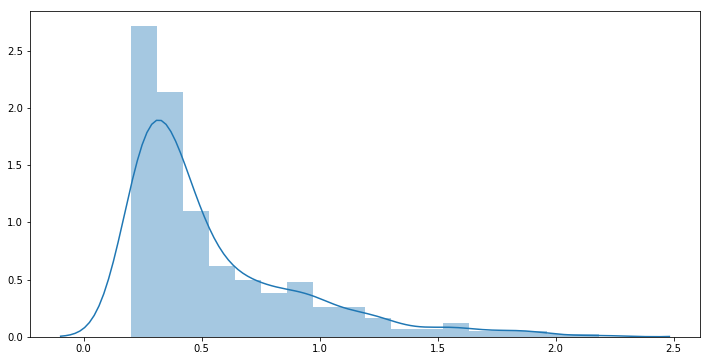

In [149]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(np.abs(coe_usefulwords))
plt.show()

## (2).Tfidf

In [75]:
tfidf = df_tfidf

In [76]:
clf_t = LogisticRegression(random_state=123, solver='sag')

In [77]:
clf_t.fit(tfidf,y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
coe_tfidf = clf_t.coef_

In [79]:
c = abs(coe_tfidf)>1

In [80]:
coe_tfidf_all = coe_tfidf[c]

In [81]:
allwords = list(tfidf.columns)

In [82]:
useful_words = list(compress(allwords, list(c[0])))

In [83]:
coe_usefulwords = list(coe_tfidf_all)

In [84]:
dic = dict(zip(useful_words,coe_usefulwords))

In [85]:
df = pd.DataFrame(columns=['words','score'],index=range(coe_tfidf_all.shape[0]))
df['words'] = useful_words
df['score'] = coe_usefulwords

In [86]:
df.iloc[df.score.values.argsort()[:10]]

,words,score
312,worst,-8.196511
143,mediocre,-6.982294
194,notworth,-6.375627
120,horrible,-6.197028
33,bland,-5.967597
285,terrible,-5.926594
60,disappointing,-5.840991
87,flavorless,-5.276968
200,ok,-5.272287
209,overpriced,-4.840953


In [87]:
df.iloc[df.score.values.argsort()[::-1][:10]]

,words,score
54,delicious,7.043990
8,amazing,5.709487
104,great,5.482821
73,excellent,5.442165
29,best,5.182681
20,awesome,4.964996
78,fantastic,4.798915
81,favorite,4.768694
213,perfect,4.064217
217,phenomenal,4.029358


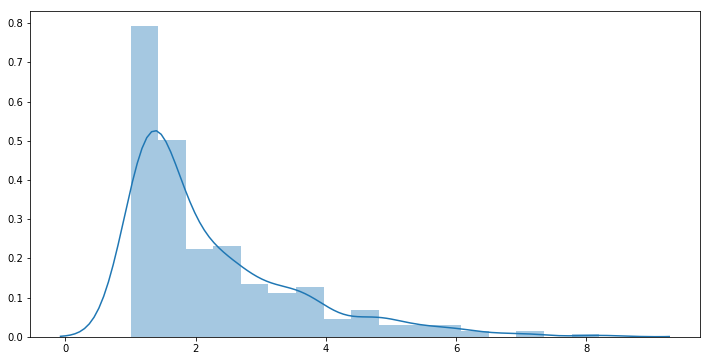

In [88]:
f, ax= plt.subplots(figsize = (12,6))
sns.distplot(np.abs(coe_usefulwords))
plt.show()

# 3.Ranking

## (0).Aggregate Functions

In [83]:
def food(x):  #
    pattern = re.compile(r'duanju.+?food.+?duanju')  #
    result = pattern.findall(x)
    if result != []:
        string_f = ''.join(result)
        split_f = string_f.split()
        rev_f = ' '.join(split_f[::-1])
        result_s = pattern.findall(rev_f)
        string_s = ''.join(result_s)
        split_s = string_s.split()
        split_s.pop(0)
        split_s.pop()
        rev_s = ' '.join(split_s[::-1])
    else:
        pattern = re.compile(r'.+?food.+?duanju')    #
        result = pattern.findall(x)
        if result != []:
            split_t = ''.join(result).split()
            split_t.pop()
            rev_s = ' '.join(split_t)
        else:
            rev_s = 'GG'
    return rev_s

In [84]:
def zhixing_f(x):
    blst = [] #first part
    for i in range(x.shape[0]):                     #
        blst.append("food" in x['text'].iloc[i])   #
    lst = list(range(x.shape[0]))    #
    lst_food = list(compress(lst,blst))  #
    qq_food = x.iloc[lst_food] #
    lst_f = []  #second
    for var in qq_food['text']:   #
        lst_f.append(food(var))  ##
    df_f = pd.DataFrame(lst_f,columns=['text']) ##
    df_f_adjs = df_f['text'].apply(sentenceClean4) ##
    food_score = []  #third
    a = 0
    for i in range(df_f_adjs.shape[0]): #
        if df_f_adjs[i] == '':  #
            a = 0
            food_score.append(a)   #
        else:
            a = 0
            for j in range(len(df_f_adjs[i].split())): #
                a += dic[df_f_adjs[i].split()[j]] #
            food_score.append(a)   #
    food_score = pd.DataFrame(food_score,columns=['scores'])  ##
    avg_food_score = np.mean(food_score['scores'])  #
    food_score_all.append(avg_food_score)

In [85]:
def price(x):  #
    pattern = re.compile(r'duanju.+?price.+?duanju')  #
    result = pattern.findall(x)
    if result != []:
        string_f = ''.join(result)
        split_f = string_f.split()
        rev_f = ' '.join(split_f[::-1])
        result_s = pattern.findall(rev_f)
        string_s = ''.join(result_s)
        split_s = string_s.split()
        split_s.pop(0)
        split_s.pop()
        rev_s = ' '.join(split_s[::-1])
    else:
        pattern = re.compile(r'.+?price.+?duanju')    #
        result = pattern.findall(x)
        if result != []:
            split_t = ''.join(result).split()
            split_t.pop()
            rev_s = ' '.join(split_t)
        else:
            rev_s = 'GG'
    return rev_s

In [86]:
def zhixing_p(x):
    blst = [] #first part
    for i in range(x.shape[0]):                     #
        blst.append("price" in x['text'].iloc[i])   ##################
    lst = list(range(x.shape[0]))    #
    lst_food = list(compress(lst,blst))  #
    qq_food = x.iloc[lst_food] #
    lst_f = []  #second
    for var in qq_food['text']:   #
        lst_f.append(price(var))  #####################
    df_f = pd.DataFrame(lst_f,columns=['text']) ##
    df_f_adjs = df_f['text'].apply(sentenceClean4) ##
    food_score = []  #third
    a = 0
    for i in range(df_f_adjs.shape[0]): #
        if df_f_adjs[i] == '':  #
            a = 0
            food_score.append(a)   #
        else:
            a = 0
            for j in range(len(df_f_adjs[i].split())): #
                a += dic[df_f_adjs[i].split()[j]] #
            food_score.append(a)   #
    food_score = pd.DataFrame(food_score,columns=['scores'])  ##
    avg_food_score = np.mean(food_score['scores'])  #
    price_score_all.append(avg_food_score)     ################

In [87]:
def service(x):  #
    pattern = re.compile(r'duanju.+?service.+?duanju')  #
    result = pattern.findall(x)
    if result != []:
        string_f = ''.join(result)
        split_f = string_f.split()
        rev_f = ' '.join(split_f[::-1])
        result_s = pattern.findall(rev_f)
        string_s = ''.join(result_s)
        split_s = string_s.split()
        split_s.pop(0)
        split_s.pop()
        rev_s = ' '.join(split_s[::-1])
    else:
        pattern = re.compile(r'.+?service.+?duanju')    #
        result = pattern.findall(x)
        if result != []:
            split_t = ''.join(result).split()
            split_t.pop()
            rev_s = ' '.join(split_t)
        else:
            rev_s = 'GG'
    return rev_s

In [88]:
def zhixing_s(x):
    blst = [] #first part
    for i in range(x.shape[0]):                     #
        blst.append("service" in x['text'].iloc[i])   ##################
    lst = list(range(x.shape[0]))    #
    lst_food = list(compress(lst,blst))  #
    qq_food = x.iloc[lst_food] #
    lst_f = []  #second
    for var in qq_food['text']:   #
        lst_f.append(service(var))  #####################
    df_f = pd.DataFrame(lst_f,columns=['text']) ##
    df_f_adjs = df_f['text'].apply(sentenceClean4) ##
    food_score = []  #third
    a = 0
    for i in range(df_f_adjs.shape[0]): #
        if df_f_adjs[i] == '':  #
            a = 0
            food_score.append(a)   #
        else:
            a = 0
            for j in range(len(df_f_adjs[i].split())): #
                a += dic[df_f_adjs[i].split()[j]] #
            food_score.append(a)   #
    food_score = pd.DataFrame(food_score,columns=['scores'])  ##
    avg_food_score = np.mean(food_score['scores'])  #
    service_score_all.append(avg_food_score)     ################

In [89]:
food_score_all = []

In [90]:
price_score_all = []

In [91]:
service_score_all = []

## (1).Application on chinese resaurant in Madison

In [92]:
words_score = df

In [93]:
dic = dict(zip(words_score['words'],words_score['score']))

In [94]:
adjs = list(words_score['words'])

In [102]:
dic_id_name = dict(zip(mad_chi_final['business_id'],mad_chi_final['names']))

In [103]:
pd.DataFrame(mad_chi_final['text']).groupby(mad_chi_final['business_id']).apply(zhixing_f)
pd.DataFrame(mad_chi_final['text']).groupby(mad_chi_final['business_id']).apply(zhixing_p)
pd.DataFrame(mad_chi_final['text']).groupby(mad_chi_final['business_id']).apply(zhixing_s)

""


In [104]:
food_score_all = food_score_all[1:]
price_score_all = price_score_all[1:]
service_score_all = service_score_all[1:]

In [105]:
avg_stars = mad_chi_final['stars'].groupby(mad_chi_final['business_id']).apply(np.mean)

In [106]:
ranking = pd.DataFrame(index=range(24),columns=['Name','Food','Price','Service','Avg-stars'])
ranking['Name'] = dic_id_name.values()
ranking['Food']  = food_score_all
ranking['Price'] = price_score_all
ranking['Service'] =  service_score_all
ranking['Avg-stars'] = avg_stars.values

In [107]:
ranking

,Name,Food,Price,Service,Avg-stars
0,DumplingHaus,0.022103,-0.324424,0.096001,3.767442
1,Hong Kong Cafe,-0.936759,-0.757243,0.139010,2.985915
2,Bahn Thai Restaurant,-0.063567,0.327551,-0.340548,3.532468
3,Flaming Wok,-0.103574,0.468692,-0.052243,3.153846
4,Noodles & Company,-0.417332,-0.376087,-0.008943,2.894737
5,Orient House,0.131335,0.137891,-0.179039,3.488550
6,World Buffet,-0.799988,-0.238134,-0.047105,2.892308
7,Double 10,-0.068549,-0.411850,0.438345,3.955224
8,Asian Sweet Bakery,0.097313,0.536490,0.311303,4.340206
9,Taiwan Little Eats,0.355481,-0.278307,0.076682,4.078125


## (2).Improvement: Credibility

In [108]:
tnum_reviews = mad_chi_final['business_id'].groupby(mad_chi_final['business_id']).count()

In [109]:
tnum = list(tnum_reviews.values)

In [110]:
num_food = []
num_price = []
num_service = []

In [111]:
def food_only(x):
    blst = []
    for i in range(x.shape[0]):
        blst.append("food" in x['text'].iloc[i])
    num_food.append(sum(blst))

In [112]:
def price_only(x):
    blst = []
    for i in range(x.shape[0]):
        blst.append("price" in x['text'].iloc[i])
    num_price.append(sum(blst))

In [113]:
def service_only(x):
    blst = []
    for i in range(x.shape[0]):
        blst.append("service" in x['text'].iloc[i])
    num_service.append(sum(blst))

In [114]:
pd.DataFrame(mad_chi_final['text']).groupby(mad_chi_final['business_id']).apply(food_only)
pd.DataFrame(mad_chi_final['text']).groupby(mad_chi_final['business_id']).apply(price_only)
pd.DataFrame(mad_chi_final['text']).groupby(mad_chi_final['business_id']).apply(service_only)

""


In [115]:
num_food = num_food[1:]
num_price = num_price[1:]
num_service = num_service[1:]

In [116]:
food_ratio = []
price_ratio = []
service_ratio = []

In [117]:
for i in range(len(tnum)):
    food_ratio.append(num_food[i]/tnum[i])
    price_ratio.append(num_price[i]/tnum[i])
    service_ratio.append(num_service[i]/tnum[i])

In [118]:
food_new = []
price_new = []
service_new = []

In [119]:
for i in range(len(tnum)):
    food_new.append(ranking['Food'].iloc[i]*food_ratio[i])
    price_new.append(ranking['Price'].iloc[i]*price_ratio[i])
    service_new.append(ranking['Service'].iloc[i]*service_ratio[i])

In [120]:
ranking['Food'] = food_new
ranking['Price'] = price_new
ranking['Service'] = service_new

In [121]:
ranking

,Name,Food,Price,Service,Avg-stars
0,DumplingHaus,0.011994,-0.095567,0.019349,3.767442
1,Hong Kong Cafe,-0.540945,-0.117319,0.041116,2.985915
2,Bahn Thai Restaurant,-0.040452,0.021270,-0.119413,3.532468
3,Flaming Wok,-0.075689,0.084124,-0.009377,3.153846
4,Noodles & Company,-0.214157,-0.024743,-0.001530,2.894737
5,Orient House,0.090230,0.032631,-0.042368,3.488550
6,World Buffet,-0.615376,-0.040300,-0.008696,2.892308
7,Double 10,-0.042971,-0.073764,0.058882,3.955224
8,Asian Sweet Bakery,0.041132,0.188048,0.025674,4.340206
9,Taiwan Little Eats,0.233284,-0.060880,0.008387,4.078125


## (3).Final ranking

In [122]:
cor_coe = []

In [123]:
reg = LinearRegression()

In [124]:
X = pd.DataFrame(ranking['Food']) #'Food','Price','Service'
y = ranking['Avg-stars']
reg.fit(X,y)
cor_coe.append(reg.score(X, y))

In [125]:
X = pd.DataFrame(ranking['Price']) #'Food','Price','Service'
y = ranking['Avg-stars']
reg.fit(X,y)
cor_coe.append(reg.score(X, y))

In [126]:
X = pd.DataFrame(ranking['Service']) #'Food','Price','Service'
y = ranking['Avg-stars']
reg.fit(X,y)
cor_coe.append(reg.score(X, y))

In [127]:
final_score = pd.DataFrame(ranking['Food']*cor_coe[0]+ranking['Price']*cor_coe[1]+ranking['Service']*cor_coe[2],columns=['Final_Score'])

In [128]:
ranking_f = pd.concat([ranking,final_score],axis=1)

In [129]:
c = np.argsort(ranking_f['Food'])[::-1] #'Food','Price','Service','Final_Score'
c_f = list(range(ranking.shape[0]))
a = 1
for i in range(len(c_f)):
    c_f[list(c.values)[i]] = a
    a += 1
ranking_f['Food'] = c_f #'Food','Price','Service','Final_Score'

In [130]:
c = np.argsort(ranking_f['Price'])[::-1] #'Food','Price','Service','Final_Score'
c_f = list(range(ranking.shape[0]))
a = 1
for i in range(len(c_f)):
    c_f[list(c.values)[i]] = a
    a += 1
ranking_f['Price'] = c_f #'Food','Price','Service','Final_Score'

In [131]:
c = np.argsort(ranking_f['Service'])[::-1] #'Food','Price','Service','Final_Score'
c_f = list(range(ranking.shape[0]))
a = 1
for i in range(len(c_f)):
    c_f[list(c.values)[i]] = a
    a += 1
ranking_f['Service'] = c_f #'Food','Price','Service','Final_Score'

In [132]:
c = np.argsort(ranking_f['Final_Score'])[::-1] #'Food','Price','Service','Final_Score'
c_f = list(range(ranking.shape[0]))
a = 1
for i in range(len(c_f)):
    c_f[list(c.values)[i]] = a
    a += 1
ranking_f['Final_Score'] = c_f #'Food','Price','Service','Final_Score'

In [133]:
ranking_f = ranking_f.sort_values(by = ['Final_Score'])

In [134]:
ranking_f

,Name,Food,Price,Service,Avg-stars,Final_Score
15,Double 10 Mini Hot Pot,1,12,1,4.516340,1
9,Taiwan Little Eats,2,18,9,4.078125,2
17,Magic Wok,3,11,5,4.025974,3
14,Ichiban Sichuan,4,17,10,3.623037,4
11,Umami Ramen & Dumpling Bar,6,20,3,3.694823,5
5,Orient House,5,6,16,3.488550,6
20,Tavernakaya,7,24,2,3.635838,7
8,Asian Sweet Bakery,8,1,7,4.340206,8
0,DumplingHaus,9,21,8,3.767442,9
7,Double 10,11,19,4,3.955224,10


# 4.Advice on QQ Express(Demo)

In [143]:
blst = []
for i in range(qq_text.shape[0]):
    blst.append("price" in qq_text['text'].iloc[i])
lst = list(range(qq_text.shape[0]))
lst_price = list(compress(lst,blst))
qq_price = qq_text.iloc[lst_price]
lst_p = []
for var in qq_price['text']:
    lst_p.append(price(var))
df_p = pd.DataFrame(lst_p,columns=['text'])
df_p_adjs = df_p['text'].apply(sentenceClean4)
qq_price_adjs = pd.value_counts(' '.join(list(np.unique(df_p_adjs))).split())
print(qq_price_adjs )
print("\nSince the ranking of price of QQ Express is No.2, we do not need to improve it.")

reasonably    2
priced        2
excellent     1
definitely    1
glad          1
ordered       1
better        1
reasonable    1
great         1
good          1
notthat       1
fast          1
fantastic     1
worth         1
dtype: int64

Since the ranking of price of QQ Express is No.2, we do not need to improve it.


In [144]:
blst = []
for i in range(qq_text.shape[0]):
    blst.append("service" in qq_text['text'].iloc[i]) #
lst = list(range(qq_text.shape[0]))
lst_service = list(compress(lst,blst))
qq_service = qq_text.iloc[lst_service]
lst_s = []
for var in qq_service['text']:
    lst_s.append(service(var)) #
df_s = pd.DataFrame(lst_s,columns=['text'])
df_s_adjs = df_s['text'].apply(sentenceClean4)
qq_service_adjs = pd.value_counts(' '.join(list(np.unique(df_s_adjs))).split())
print(qq_service_adjs)
print("\nThe ranking of service of QQ Express seems not too bad, if we want to improve it, try to be more polite.")

fast         5
single       2
average      1
no           1
notexpect    1
friendly     1
notbusy      1
however      1
terrible     1
great        1
good         1
highly       1
greeted      1
rude         1
notreally    1
dtype: int64

The ranking of service of QQ Express seems not too bad, if we want to improve it, try to be more polite.


In [145]:
blst = []
for i in range(qq_text.shape[0]):
    blst.append("food" in qq_text['text'].iloc[i]) #
lst = list(range(qq_text.shape[0]))
lst_food = list(compress(lst,blst))
qq_food = qq_text.iloc[lst_food]
lst_f = []
for var in qq_food['text']:
    lst_f.append(food(var)) #
df_f = pd.DataFrame(lst_f,columns=['text'])
df_f_adjs = df_f['text'].apply(sentenceClean4)
qq_food_adjs = pd.value_counts(' '.join(list(np.unique(df_f_adjs))).split())
print(qq_food_adjs[qq_food_adjs.values>=4])
print("\nThe ranking of food of QQ Express is too bad, I think the most likely reason is their food is too greasy, thus, they should change their food to be more fresh. ")

good         10
greasy        9
fast          8
authentic     5
okay          5
great         5
ordered       4
used          4
better        4
best          4
no            4
dtype: int64

The ranking of food of QQ Express is too bad, I think the most likely reason is their food is too greasy, thus, they should change their food to be more fresh. 
